Welcome to the Investigate a Dataset project!

# Project: investigate the movie database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv"
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




### Data Cleaning (Replace this with more specific notes!)

In [6]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [7]:
# drop these columns as they are too specific
df.drop(['id','imdb_id','homepage','cast','tagline','keywords','overview','vote_count','production_companies'],axis=1, inplace=True)
#rop budget & revenue as we will use adjusted for inflation columns 
df.drop(['budget','revenue'],axis=1,inplace=True)

In [8]:
df.shape

(10866, 10)

In [9]:
df.head()

,popularity,original_title,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
df.isnull().sum()

popularity         0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [11]:
#drop null values as they are not significant
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10801 non-null float64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null object
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 928.2+ KB


In [12]:
# extract only the year from the date so we analyis year by year
df.release_date = df.release_date.apply(lambda x: x.split("/")[2])
df.release_date.head()

0    15
1    15
2    15
3    15
4    15
Name: release_date, dtype: object

In [13]:
df.release_date.unique()

array(['15', '14', '77', '09', '10', '99', '01', '08', '11', '02', '94',
       '12', '03', '97', '13', '85', '05', '06', '04', '72', '80', '07',
       '79', '84', '83', '95', '92', '81', '96', '00', '82', '98', '89',
       '91', '88', '87', '68', '74', '75', '62', '64', '71', '90', '61',
       '60', '76', '93', '67', '63', '86', '73', '70', '65', '69', '78',
       '66'], dtype=object)

In [14]:
df.dtypes

popularity        float64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What kinds of properties are associated with movies that have high revenues?)

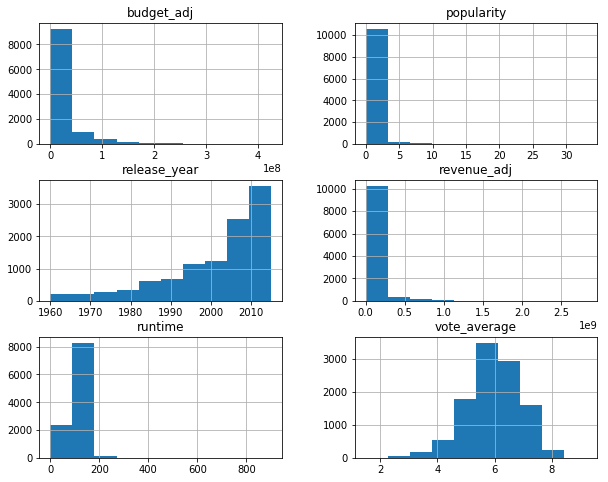

In [15]:
# Explore data proprties

df.hist(figsize=(10,8));

## let's explore revenue vs budget & popularity vs budget because they are skewed to the right

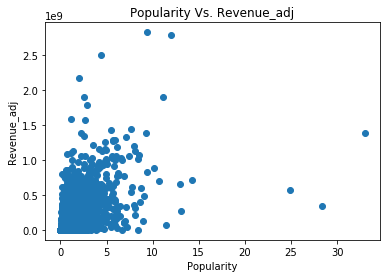

In [16]:
# there is a positive relation between popularity and revenue
# the better marketing the more popularity and revenue

plt.scatter(df.popularity, df.revenue_adj);
plt.title("Popularity Vs. Revenue_adj");
plt.xlabel("Popularity");
plt.ylabel("Revenue_adj");

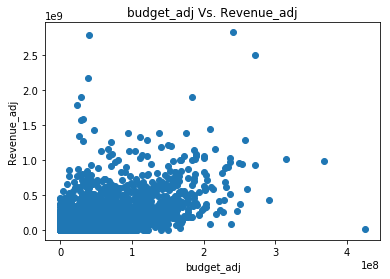

In [17]:
# A positive relation between budget and revenue

plt.scatter(df.budget_adj, df.revenue_adj);
plt.title("budget_adj Vs. Revenue_adj");
plt.xlabel("budget_adj");
plt.ylabel("Revenue_adj");

In [18]:
# the top 5 genres with highest revenue
df.nlargest(5,columns=['revenue_adj'])

,popularity,original_title,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,09,7.1,2009,2.408869e+08,2.827124e+09
1329,12.037933,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,77,7.9,1977,3.957559e+07,2.789712e+09
5231,4.355219,Titanic,James Cameron,194,Drama|Romance|Thriller,97,7.3,1997,2.716921e+08,2.506406e+09
10594,2.010733,The Exorcist,William Friedkin,122,Drama|Horror|Thriller,73,7.2,1973,3.928928e+07,2.167325e+09
9806,2.563191,Jaws,Steven Spielberg,124,Horror|Thriller|Adventure,75,7.3,1975,2.836275e+07,1.907006e+09


### Research Question 2: Which genres are most popular?

In [19]:
popular = df.groupby(['release_date','genres'])['popularity'].count().sort_values(ascending=False)
popular = pd.DataFrame(popular)

popular.reset_index(level=1, inplace=True)

popular = popular.loc[~popular.index.duplicated(keep='first')]
popular.head()

,genres,popularity
release_date,,
14,Drama,72
13,Drama,59
15,Drama,58
12,Drama,58
09,Comedy,43


In [20]:
# adjust relase date so it becomes 4 digits rather than 2
year_lst = list(popular.index)

for i,year in enumerate(year_lst):
    if int(year) >= 1 and int(year) <= 15:
        year_lst[i] = '20' + year
    elif year == '00':
        year_lst[i] = 2000    
    else:
        year_lst[i] = '19' + year
        
popular.index = year_lst
popular.reset_index(level=0, inplace=True)

In [21]:
popular.rename(columns={'index':'year'}, inplace=True)

In [22]:
# a table with the most popular genres across the years
popular

,year,genres,popularity
0,2014,Drama,72
1,2013,Drama,59
2,2015,Drama,58
3,2012,Drama,58
4,2009,Comedy,43
5,2010,Drama,37
6,2011,Drama,34
7,2007,Comedy,34
8,2008,Drama,33
9,2006,Drama,31


<a id='conclusions'></a>
## Conclusions

> At question one i noticed that with higher budget comes higher revenue,
also popularity and revenue both have a positive relation.


> At question two Drama and Comedy are the most popular generes through years

## Limititions

> The more the observations the better the analysis could be

> We need to get the most recent data as the most recent year in our data is 2015 this is important because the taste and other factors cahnges frequantly from year to year


In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0